# Lab 7

This lab consists of 2 parts:
 1. Derivation of stochastic gradient descent update for logistic regression
 2. Implementation of perceptron with a non-linear transformation

## Part 1: Theory, gradient descent for logistic regression

### Logistic Regression

Logistic regression is a binary **classification** technique, where the classes are 0 and 1. We will define our classifier as $h\left(x\right) = \sigma \left(w^T x + b\right)$, and we will interpret $h\left(x\right)$ as being the probability of obtaining class 1, $p\left( y=1|x \right)$. Consequently, the probability of obtaining class $0$ is simply $1-h\left(x\right)$.

For logistic regression we will use cross entropy as our cost function: If the real class is $y \in \left\{ 0, 1 \right\}$ then the error for an example is $\ell \left(x, y\right) = - \log p\left(y|x,h\left(x\right)\right)$. More precisely,
 - If $y=1$ then $\ell \left(h\left(x\right), 1\right) = - \log p\left(1|x,h\left(x\right)\right) = - \log \left( h\left(x\right) \right)$
 - If $y=0$ then $\ell \left(h\left(x\right), 0\right) = - \log p\left(0|x,h\left(x\right)\right) = - \log \left( 1 - h\left(x\right)\right)$
 
This can be rewritten more compactly:

$\ell \left(h\left(x\right), y\right) = - y \log \left( h\left(x\right) \right) - \left( 1 - y \right) \log \left( 1 - h\left(x\right)\right)$

### Learning by stochastic gradient descent

Now that we have a model and a cost function, we will want to learn the parameters of the model by using stochastic gradient descent. Like last week, this consists in iteratively modifying the parameters by looping on the examples $\left(x, y\right)$ and by adding $- \mu \frac{\partial \ell \left(h\left(x\right), y\right)}{\partial \theta}$. $\mu$ is the learning rate, and $\theta$ is the set of parameters, which in our case are $w$ and $b$.

The first step is to determine the gradient $\frac{\partial \ell \left(h\left(x\right), y\right)}{\partial \theta}$. For this, we will use the chain rule for derivation. In a few sessions, we will also use it for the backpropagation in neural networks. This gives: 

$$\frac{\partial \ell \left(h\left(x\right), y\right)}{\partial w} = \frac{\partial \ell \left(h, y\right)}{\partial h} \frac{\partial h\left(u\right)}{\partial u} \frac{\partial u\left(x, w, b\right)}{\partial w}$$

$$\frac{\partial \ell \left(h\left(x\right), y\right)}{\partial b} = \frac{\partial \ell \left(h, y\right)}{\partial h} \frac{\partial h\left(u\right)}{\partial u} \frac{\partial u\left( x, w, b\right)}{\partial b}$$

We note $u\left(x, w, b\right) = w^T x + b$.

**Exercice: We ask you to calculate the gradients $\frac{\partial \ell \left(h\left(x\right), y\right)}{\partial w}$ and $\frac{\partial \ell \left(h\left(x\right), y\right)}{\partial b}$.**

## Part 2: Practice, Non-linear transformations

In [5]:
%pylab inline
import numpy as np
import utilities
import time

Populating the interactive namespace from numpy and matplotlib


To demonstrate the use of non-linear transformations, we will make use of the circle and ellipse datasets, available on the website. We will first apply a transformation on the dataset before training. The algorithm will then uniquely work with the transformed data. To keep things simple at first, we will simply implement a transformation consisting of a degree two polynomial.

Reminder:

$\phi_{\text{poly}^2}(x) = \left(x_1,x_2,\dots,x_d,
\alpha_{11} x_1^2, \alpha_{22}x2^2, \dots, \alpha_{dd}x_d^2,
\alpha_{12}x_1x_2, \alpha_{13}x_1x_2, \dots, \alpha_{1d}x_1x_d, \dots, \alpha_{(d-1)d}x_{d-1}x_d\right)$

To simplify, we can use $\alpha_i=1$ $\forall i$

And to make it even more simple, the circle and ellipse datasets are only in 2-d...

$$\phi : \mathbb{R}^2 \rightarrow \mathbb{R}^6$$

$$\phi(x_1, x_2) = \left(1,x_1,x_2,x_1^2,x_2^2,x_1x_2\right)$$

**Exercise: implement this transformation in the polynomial function below:**

In [6]:
# Takes a matrix of data examples x (n datapoints, input space dimension) as input (without labels) and returns the transformed
# matrix (n datapoints, projected space dimension)
def polynomial(X):
    Y = np.zeros((X.shape[0], 6))
    Y[:,0] = 1.
    Y[:,1] = X[:,0]
    Y[:,2] = X[:,1]
    Y[:,3] = X[:,0]**2
    Y[:,4] = X[:,1]**2
    Y[:,5] = X[:,0]*X[:,1]
    return Y

Now that the transformation is implemented, you can run the code below to look at the performance of your algorithm.

In [7]:
class perceptron:
    def __init__(self, mu):
        self.mu = mu
    
    def train(self, train_data):
        n_example = train_data.shape[0]
            
        self.weights = np.random.random(train_data.shape[1]-1)

        i = 0
        count = 0 # We stop when the set is linearly separated
        n_iter = 0
        n_iter_max = n_example*100
        while (count < n_example and n_iter < n_iter_max):
            if (np.dot(train_data[i, :-1], self.weights)) * train_data[i,-1] < 0:
                self.weights += self.mu * train_data[i,-1] * train_data[i, :-1]
                count = 0
            else:
                  count = count + 1
            i = (i + 1) % n_example
            n_iter += 1

    def compute_predictions(self, test_data):
        outputs = []
        for i in range(len(test_data)):
            data = []
            for j in range(len(test_data[i])):
                data.append(test_data[i][j])
            outputs.append(np.dot(data, self.weights))
        return outputs

We will train a perceptron on  1500  training examples
It took us  0.0030609999999997584  seconds to calculate the predictions on  500  test datapoints
The test error is  0.6000000000000005 %


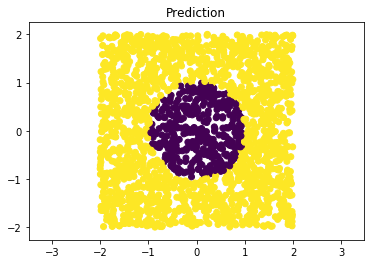

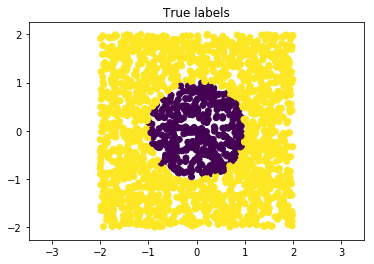

In [10]:
# We start by loading the dataset
data = np.loadtxt('cercle.txt')
#data = np.loadtxt('ellipse.txt')

# There are only 2 dimensions...
train_cols = [0,1]
# A variable to hold the index of the label column.
target_ind = [data.shape[1] - 1]

# Number of classes
n_classes = 2
# Number of training points
n_train = 1500
# Grid size = grid_size x grid_size
grid_size = 50

print("We will train a perceptron on ", n_train, " training examples")

# Uncomment to get non-deterministic results 
random.seed(3395)

# Randomly select indices for the training and test set
inds = np.arange(data.shape[0])
random.shuffle(inds)
train_inds = inds[:n_train]
test_inds = inds[n_train:]
    
# Separate the dataset into two sets: training and test.
train_set = data[train_inds,:]	# keep the good rows
train_set = train_set[:,train_cols + target_ind]  # keep the right columns
test_set = data[test_inds,:]
test_set = test_set[:,train_cols + target_ind]

# Separate the test set: inputs and labels.
test_inputs = test_set[:,:-1]
test_labels = test_set[:,-1]

# The learning rate
mu = 0.005

# Transform the dataset
transformed_train_set = np.concatenate((polynomial(train_set[:,:-1]),train_set[:,-1][:,None]),axis=1)
transformed_test_inputs = polynomial(test_inputs)

# Create and train the model
model_perceptron = perceptron(mu)
model_perceptron.train(transformed_train_set)

# Obtain the ouputs on the test set.
t1 = time.clock()
outputs = model_perceptron.compute_predictions(transformed_test_inputs)
t2 = time.clock()
print('It took us ', t2-t1, ' seconds to calculate the predictions on ', transformed_test_inputs.shape[0],' test datapoints')

# Convert the outputs into classes by taking the sign.
classes_pred = np.sign(outputs)
   
# Measure the performance
err = 1.0 - np.mean(test_labels==classes_pred)
print("The test error is ", 100.0 * err,"%")

# Plotting a graph
if len(train_cols) == 2:
    # Decision boundary
    t1 = time.clock()
    outputs = model_perceptron.compute_predictions(transformed_train_set[:,:-1])
    # Convert the outputs into classes by taking the sign.
    train_classes_pred = np.sign(outputs)
    plt.scatter(train_set[:,0],train_set[:,1],c=train_classes_pred)
    plt.scatter(test_set[:,0],test_set[:,1],c=classes_pred)
    plt.title('Prediction')
    plt.axis('equal')
    plt.show()
    
    plt.scatter(train_set[:,0],train_set[:,1],c=train_set[:,-1])
    plt.scatter(test_set[:,0],test_set[:,1],c=test_labels)
    plt.title('True labels')
    plt.axis('equal')
    plt.show()

    t2 = time.clock()
        
else:
    print('Too many dimensions (', len(train_cols),') to draw the surface decision')

## 2. Kernel trick

Your objective for this section is to implement a gaussian kernel perceptron. We will ask you to use a gaussian kernel for this problem. For a review, please refer to the [course document](https://studium.umontreal.ca/pluginfile.php/4043631/mod_resource/content/2/13_kernel_trick-en-3395.pdf), especially the second part.

**Exercise: implement a polynomial kernel function of arbitrary degree**

In [ ]:
def kernel_polynomial(x,y,deg=2):
    return ...

Now, we will implement the kernel perceptron.

**Exercise: Complete the code below for the kernel perceptron algorithmn**

Hint: Reuse the perceptron code above, but rather than learning the vector $w$ directly, you need to rewrite $w = \sum_i \alpha_i x_i$ and to learn the coefficients $a_i$. Then, we replace $w^T x$ by $\left(\sum_i \alpha_i x_i\right)^T x$ and apply the kernel trick.

In [ ]:
class KernelPerceptron:
    def __init__(self, mu, kernel_fn):
        self.mu = mu
        self.kernel_fn = kernel_fn

    def train(self, train_data):
        n_example = train_data.shape[0]
        self.train_data = np.array(train_data)

        # alpha initialisation
        self.a = np.zeros(n_example)

        # Get rid of the labels
        train_x = self.train_x = self.train_data[:,:-1]
        train_y = self.train_y = self.train_data[:,-1]

        # Gram matrix
        K = np.zeros((n_example, n_example))
        for i in range(n_example):
            K[i] = self.kernel_fn(train_x[i], train_x)

        # Kernel calculation
        i = 0
        count = 0
        n_iter = 0
        n_iter_max = n_example*100
        while (count < n_example and n_iter < n_iter_max):
            if ...:
                ...
            else:
                count = count + 1
            i = (i + 1) % n_example
            n_iter += 1

    def compute_predictions(self, test_data):
        outputs = []
        for i in range(len(test_data)):
            outputs.append(np.sum(self.kernel_fn(test_data[i], self.train_x)*self.a*self.train_y))
        return outputs

In [ ]:
# Load the dataset
#data = np.loadtxt('ellipse.txt')
data = np.loadtxt('cercle.txt')

# The columns (dim/features) on which we will learn our model
# For gridplot to work, len(train_cols) should be 2
train_cols = [0,1]
# Index of the column containing the labels
target_ind = [data.shape[1] - 1]

# Number of classes
n_classes = 2
# Number of training points
n_train = 1500
# Grid size = grid_size x grid_size
grid_size = 50

print("We will learn a linear algorithm on ", n_train, " training examples")

# Uncomment to get non-deterministic results
np.random.seed(3395)
# Randomly assign indices for the training and test set
inds = np.arange(data.shape[0])
np.random.shuffle(inds)
train_inds = inds[:n_train]
test_inds = inds[n_train:]

# Separate the dataset into the two sets
train_set = data[train_inds,:]
train_set = train_set[:,train_cols + target_ind]
test_set = data[test_inds,:]
test_set = test_set[:,train_cols + target_ind]

# Separate the test set into inputs and labels
test_inputs = test_set[:,:-1]
test_labels = test_set[:,-1]

mu = 0.00005
model = KernelPerceptron(mu, kernel_polynomial)
model.train(train_set)

# Obtain its predictions
t1 = time.clock()
outputs = model.compute_predictions(test_inputs)

t2 = time.clock()
print('It took us ', t2-t1, ' seconds to calculate predictions on ', test_inputs.shape[0],' test points')

# Majority vote (+1 since our classes are labeled from 1 to n)
classes_pred = np.sign(outputs)

# Run the tests
err = 1.0 - np.mean(test_labels==classes_pred)
print("The test error is of ", 100.0 * err,"%")

if len(train_cols) == 2:
    # Decision boundary
    outputs = model.compute_predictions(train_set[:,:-1])
    train_classes_pred = np.sign(outputs)
    plt.scatter(train_set[:,0],train_set[:,1],c=train_classes_pred)
    plt.scatter(test_set[:,0],test_set[:,1],c=classes_pred)
    plt.show()

    plt.scatter(train_set[:,0],train_set[:,1],c=train_set[:,-1])
    plt.scatter(test_set[:,0],test_set[:,1],c=test_labels)
    plt.show()
else:
    print('Too many dimensions (', len(train_cols),') to plot the decision boundary')